# Procesamiento de estados de polarización 

## 1. ¿Cuáles son los estados de polarización posible de una onda electromagnética?
# Estados de Polarización de una Onda Electromagnética

La **polarización** de una onda electromagnética describe la evolución temporal y espacial de la **dirección del vector campo eléctrico** en el plano perpendicular a la dirección de propagación. Esta propiedad es fundamental en óptica porque determina cómo interactúa la luz con medios materiales, filtros, estructuras anisotrópicas y dispositivos ópticos.

## 1. Representación General del Campo Eléctrico

Una onda electromagnética plana que se propaga en la dirección $ z $, con frecuencia angular $ \omega $ y longitud de onda $ \lambda $, se puede escribir como:

$$
\vec{E}(z, t) = \text{Re} \left\{ \left( E_{0x} e^{i\delta_x} \hat{x} + E_{0y} e^{i\delta_y} \hat{y} \right) e^{i(kz - \omega t)} \right\}
$$

Donde:

- $ E_{0x} $, $ E_{0y} $: amplitudes de las componentes ortogonales del campo eléctrico.
- $ \delta_x $, $ \delta_y $: fases iniciales.
-$ \Delta \delta = \delta_y - \delta_x $: diferencia de fase.
- $ k = \frac{2\pi}{\lambda} $: número de onda.

El estado de polarización está completamente determinado por los valores de $ E_{0x}, E_{0y} $ y $ \Delta\delta $.

---

## Tipos de Polarización

###  Polarización Lineal

Ocurre cuando ambas componentes están en fase o desfasadas por un múltiplo de $\pi $:

$$
\Delta \delta = m\pi, \quad m \in \mathbb{Z}
$$

#### Propiedades:

- El vector $\vec{E}(t) $ describe una **línea recta** en el plano transversal.
- La dirección de polarización depende de la relación de amplitudes $\frac{E_{0y}}{E_{0x}} $.

#### Ejemplo:

$$
\vec{E}(t) = E_0 \cos(\omega t) \hat{x}
$$

---

### Polarización Circular

Ocurre cuando las amplitudes son iguales y la diferencia de fase es de $ \frac{\pi}{2} $:

$$
E_{0x} = E_{0y}, \quad \Delta \delta = \pm \frac{\pi}{2}
$$

#### Ejemplo:

$$
\vec{E}(t) = E_0 \left[ \cos(\omega t) \hat{x} + \sin(\omega t) \hat{y} \right]
$$

Dependiendo del signo de $ \Delta \delta $, puede ser **circular derecha** o **circular izquierda**.

## 2. ¿Cuándo se obtiene un estado de polarización elíptico?

### Polarización Elíptica

Es el caso más general, con amplitudes distintas y desfase arbitrario:

$$
\Delta \delta \neq m\pi, \quad E_{0x} \neq E_{0y}
$$

La trayectoria de la punta del campo eléctrico es una **elipse**. El ángulo  $\psi $ de rotación de la elipse viene dado por:

$$
\tan(2\psi) = \tan(2\alpha)\cos(\Delta \delta), \quad \text{con } \tan \alpha = \frac{E_{0y}}{E_{0x}}
$$
### Sentido de rotación

El campo eléctrico describe la elipse en un sentido de rotación (horario o antihorario), que se determina por el signo de $ \Delta\delta $:

- Si $\Delta\delta > 0 $: rotación antihoraria (polarización elíptica izquierda).
- Si $ \Delta\delta < 0 $: rotación horaria (polarización elíptica derecha).

Este sentido se puede determinar observando la evolución temporal del vector $ \vec{E}(t) $.


### Ecuación General de la Trayectoria

La trayectoria del vector campo eléctrico proyectado en el plano \( x-y \) sigue la ecuación:

$$
\frac{E_x^2}{E_{0x}^2} - 2\frac{E_x}{E_{0x}}\frac{E_y}{E_{0y}}\cos(\Delta \delta) + \frac{E_y^2}{E_{0y}^2} = \sin^2(\Delta \delta)
$$

Esta describe una **cónica** que será una elipse (el caso general), un círculo (si $E_{0x} = E_{0y} $, $ \Delta \delta = \pm \frac{\pi}{2} $, o una recta (si $\Delta \delta = m\pi $).

---

### Análisis

Se exploran experimentalmente los estados de polarización usando:

- Luz blanca (no polarizada).
- Dos polarizadores lineales (PL1 y PL2).
- Una lámina birrefringente (escuadra de acrílico).

La intensidad transmitida tras el segundo polarizador se expresa como:

$$
I(\theta) = E_{0x}^2 \cos^2 \theta + E_{0y}^2 \sin^2 \theta + E_{0x} E_{0y} \sin(2\theta) \cos(\Delta \delta)
$$

Donde $ \theta $ es el ángulo entre los ejes de transmisión de los polarizadores.

Esto se puede expresar como una interferencia entre dos componentes ortogonales:

$$
I_\theta = I_x + I_y + 2\sqrt{I_x I_y} \cos(\Delta \delta)
$$

Con:

$$
I_x = E_{0x}^2 \cos^2 \theta, \quad I_y = E_{0y}^2 \sin^2 \theta
$$

---
### Excentricidad de la Elipse de Polarización

La forma de la elipse puede caracterizarse con su excentricidad:

$$
e = \sqrt{1 - \left( \frac{E_{\min}}{E_{\max}} \right)^2 }
$$

Donde $E_{\min} $, $ E_{\max} $ son los valores mínimos y máximos de la amplitud proyectada del campo eléctrico.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import ceil, sqrt

# Escoge puntos al azar dentro del círculo
def puntos_en_circulo(n):
    r = 400 * np.sqrt(np.random.rand(n))
    θ = 2 * np.pi * np.random.rand(n)
    x = 450 + r * np.cos(θ)
    y = 450 + r * np.sin(θ)
    return np.column_stack((x, y)).astype(int)

def graficar_elipses(rgb, angulos , pixeles):  # angulos: radianes
    puntos = puntos_en_circulo(pixeles)
    c = ('r', 'b', 'g')

    filas = ceil(sqrt(pixeles))
    cols = ceil(pixeles / filas)
    θ = np.linspace(0, 360, 360) * np.pi / 180
    fig, axs = plt.subplots(filas, cols, subplot_kw={'projection': 'polar'}, figsize=(4*cols, 4*filas))
    axs = np.array(axs).reshape(-1)  # Asegura que sea plano e indexable

    for ax, p in zip(axs, puntos):
        for i in range(3):
            ax.plot(angulos, rgb[:, p[0], p[1], i], color=c[i])
            Emax = max(rgb[:, p[0], p[1], i])
            Emin = min(rgb[:, p[0], p[1], i])
            indice_max = np.argmax(rgb[:, p[0], p[1], i])
            indice_min = np.argmin(rgb[:, p[0], p[1], i])
            ψ_max = angulos[indice_max]
            ψ_min = angulos[indice_min]

            if ψ_max > np.pi:
                ψ_max -= np.pi
            if ψ_min > np.pi:
                ψ_min -= np.pi
            
            if ψ_min<ψ_max: ψ = (ψ_max+ψ_min+np.pi/2)/2
            else: ψ = (ψ_max+ψ_min-np.pi/2)/2
            
           

            eps = 1e-6
            if Emax > eps and Emin > eps:
                rθ = 1 / np.sqrt((np.cos(θ - ψ) / Emax) ** 2 + (np.sin(θ - ψ) / Emin) ** 2)
                ax.plot(θ, rθ, color=c[i], linestyle=':')
            else: 
                ax.plot([ψ, ψ], [0, Emax], color=c[i], linestyle=':')
                ax.plot([ψ+np.pi, ψ+np.pi], [0, Emax], color=c[i], linestyle=':')

        ax.set_title(f"({p[0]},{p[1]})", fontsize=9)

    # Desactiva los ejes vacíos si hay más subplots que pixeles
    for ax in axs[pixeles:]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()


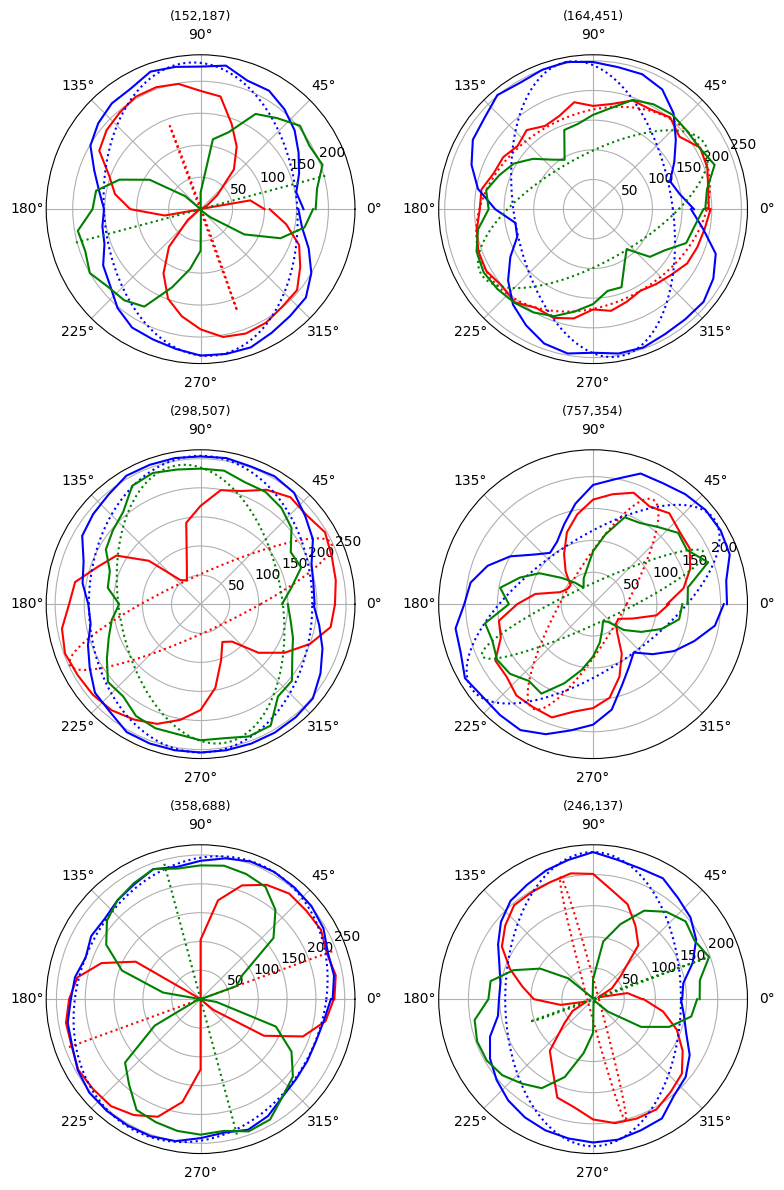

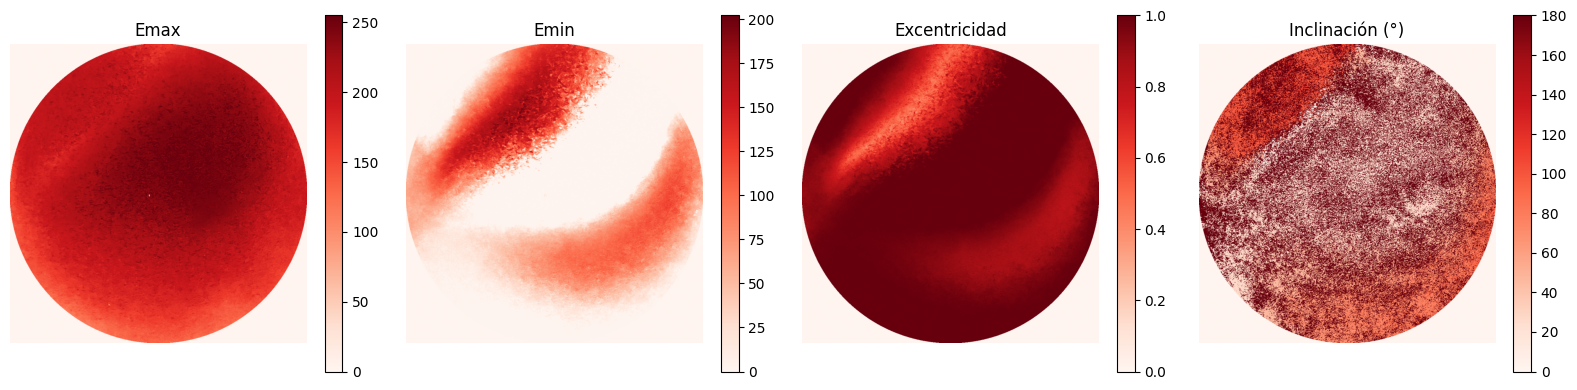

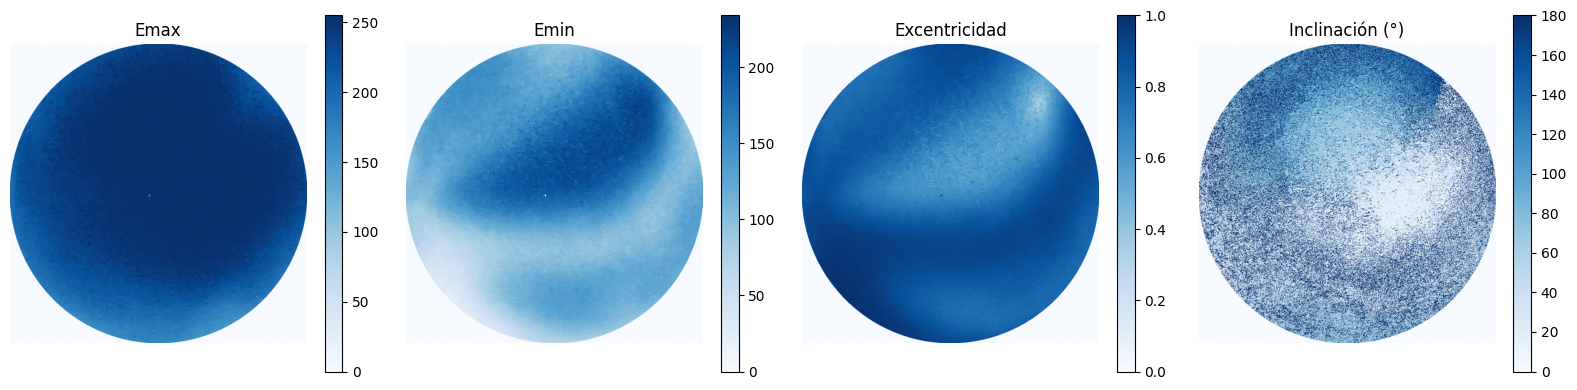

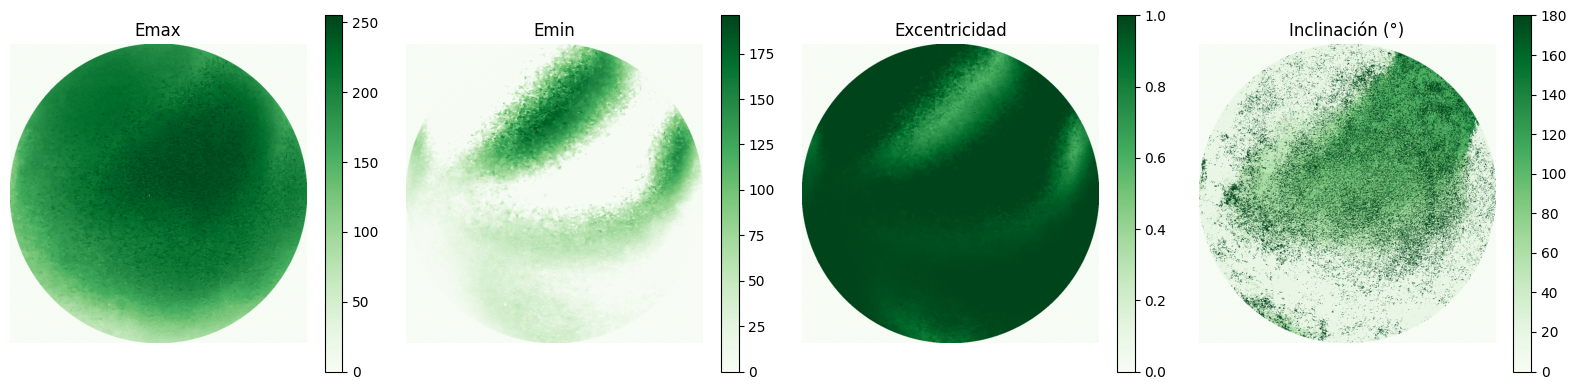

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread



rgb=[]
angulos = np.linspace(0, 2*np.pi, 37)

# Se cargan las imagenes en una lista y luego se convierte en stack.
for i in range(37):
    rgb.append(imread(f"images/{i}.png")[:,:,:])
rgb = np.stack(rgb)
size=rgb[1,:,:,0].shape

# Graficos polares 9 pixeles al hazar 
graficar_elipses(rgb,angulos,6)

# Se crean las arrays para las variables 
Emax=np.zeros(size)
Emin=np.zeros(size)
ψ=np.zeros(size)
cmaps=('Reds','Blues','Greens')

# Se hace para rgb (0,1,2)
for colores in (0,1,2):
    #Se recorre el mismo pixel en cada imagen y se encuentra el campo maximo, el minimo y el angulo correspondiente al maximo
    for m in range(size[0]):   # imagen (M,N) 
        for n in range(size[1]): # imagen (M,N)
            #plt.subplot(projection='polar')
            #plt.plot(angulos, rgb[:,m, n], color='r')
            Emax[m,n]=max(rgb[:,m, n,colores])
            Emin[m,n]=min(rgb[:,m, n,colores])
            indice_max = np.argmax(rgb[:, m, n,colores])
            ψ[m,n]=angulos[indice_max]
        #plt.show()
    
    #GRAFICAS

    fig, axs = plt.subplots(1, 4, figsize=(16, 4))

    # Emax
    im0 = axs[0].imshow(Emax, cmap=cmaps[colores])
    fig.colorbar(im0, ax=axs[0])
    axs[0].axis('off')
    axs[0].set_title("Emax")

    # Emin
    im1 = axs[1].imshow(Emin, cmap=cmaps[colores])
    fig.colorbar(im1, ax=axs[1])
    axs[1].axis('off')
    axs[1].set_title("Emin")

    # Excentricidad
    e = np.zeros_like(Emax)
    mask = Emax > 1e-3
    e[mask] = np.sqrt(1 - (Emin[mask] / Emax[mask])**2)

    im2 = axs[2].imshow(e, cmap=cmaps[colores], vmin=0, vmax=1)
    fig.colorbar(im2, ax=axs[2])
    axs[2].axis('off')
    axs[2].set_title("Excentricidad")

    # Inclinación (ψ en grados)
    ψ=ψ * 180 / np.pi
    ψ = np.where(ψ > np.pi, ψ - np.pi, ψ)

    
    im3 = axs[3].imshow(ψ , cmap=cmaps[colores], vmin=0, vmax=180)
    fig.colorbar(im3, ax=axs[3])
    axs[3].axis('off')
    axs[3].set_title("Inclinación (°)")

    plt.tight_layout()
    plt.show()





    
    





<!--  -->

Los puntos donde la excentricidad es 1 se tienen cuando la luz esta linealmente polarizada, que ademas coincide con los puntos donde $E_{min}\approx 0$. Mientras que los puntos con poca excentricidad tienden a ser circulos 